# This dataset analyzes information on sex crimes, a part 1 crime as defined by the FBI, in Los Angeles during the year 2022
## This analysis is done with Python and the pandas, matplotlib, and csv libraries, with the goal of producing further understanding of the characteristics of these events.
## The source of this data can be found below
### Source: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
### This data is only as good as the data reported in the database

In [61]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df['Date'] = pd.to_datetime(df['DATE OCC'])
df = df.loc[(df['Date'].dt.year==2022)]# & (df['Date'].dt.month== 8)] 

### Let's check the first few rows and the shape of the data

In [63]:
df.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date
403810,220805283,01/24/2022 12:00:00 AM,01/22/2022 12:00:00 AM,1445,8,West LA,855,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,Invest Cont,341.0,NaN,NaN,NaN,1600 CAMDEN AV,NaN,34.0501,-118.4439,2022-01-22
403811,221100536,01/21/2022 12:00:00 AM,01/21/2022 12:00:00 AM,1410,11,Northeast,1149,2,649,DOCUMENT FORGERY / STOLEN FELONY,...,Invest Cont,649.0,998.0,NaN,NaN,5400 N FIGUEROA ST,NaN,34.1076,-118.1969,2022-01-21
403812,221705337,02/07/2022 12:00:00 AM,02/07/2022 12:00:00 AM,830,17,Devonshire,1751,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,21800 CRAGGYVIEW ST,NaN,34.2554,-118.6050,2022-02-07
403813,221405082,01/24/2022 12:00:00 AM,01/23/2022 12:00:00 AM,1300,14,Pacific,1407,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,NaN,NaN,NaN,JASMINE AV,PALMS BL,34.0275,-118.4064,2022-01-23
403814,220404359,01/12/2022 12:00:00 AM,01/12/2022 12:00:00 AM,100,4,Hollenbeck,459,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,3100 MALABAR ST,NaN,34.0459,-118.1968,2022-01-12


In [64]:
df.shape

(23773, 29)

### Now let's start reviewing the crimes in LA, narrowing in on sex crimes

<AxesSubplot:title={'center':'Types of Crimes'}>

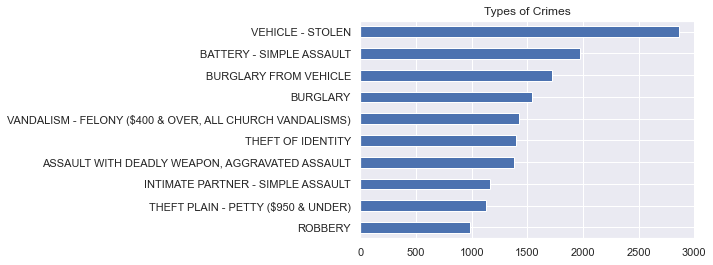

In [65]:
df['Crm Cd Desc'].value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

## There are 21 geographic areas in the city of Los Angeles, as defined by the LAPD

<AxesSubplot:title={'center':'Total of Crime Events by Area'}>

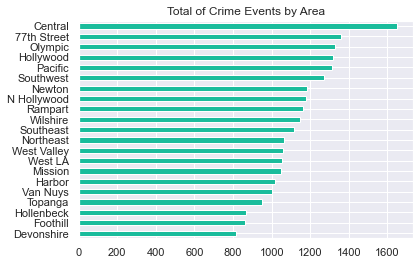

In [66]:
df['AREA NAME'].value_counts().sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total of Crime Events by Area')

### Now let's query for sex crimes and create a new dataframe with the copy command

In [67]:
sex_crimes = df[df['Crm Cd Desc'].str.contains('SEX CRIMES|RAPE')].copy()
sex_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date
403894,220105324,01/23/2022 12:00:00 AM,01/22/2022 12:00:00 AM,2000,1,Central,147,1,121,"RAPE, FORCIBLE",...,Invest Cont,121.0,998.0,NaN,NaN,5TH,SAN JULIAN,34.0446,-118.2450,2022-01-22
404423,221205732,02/02/2022 12:00:00 AM,02/02/2022 12:00:00 AM,2000,12,77th Street,1263,1,122,"RAPE, ATTEMPTED",...,Adult Arrest,122.0,910.0,NaN,NaN,LA SALLE AV,79TH ST,33.9636,-118.3112,2022-02-02
404887,220100525,01/30/2022 12:00:00 AM,01/30/2022 12:00:00 AM,1300,1,Central,162,1,121,"RAPE, FORCIBLE",...,Invest Cont,121.0,998.0,NaN,NaN,700 S HOPE ST,NaN,34.0480,-118.2577,2022-01-30
405040,220204601,01/14/2022 12:00:00 AM,01/14/2022 12:00:00 AM,2200,2,Rampart,201,1,121,"RAPE, FORCIBLE",...,Invest Cont,121.0,998.0,NaN,NaN,1000 N NORMANDIE AV,NaN,34.0885,-118.3005,2022-01-14
405255,220104778,01/14/2022 12:00:00 AM,01/14/2022 12:00:00 AM,130,1,Central,185,1,121,"RAPE, FORCIBLE",...,Invest Cont,121.0,998.0,NaN,NaN,900 S BROADWAY,NaN,34.0423,-118.2561,2022-01-14


<AxesSubplot:title={'center':'Sex Crimes by Area in 2022'}>

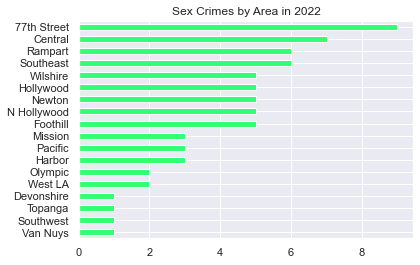

In [68]:
sex_crimes['AREA NAME'].value_counts().sort_values().plot(kind="barh", color = '#33ff74', title = 'Sex Crimes by Area in 2022')

<AxesSubplot:title={'center':'Sex Crimes by Type in 2022'}>

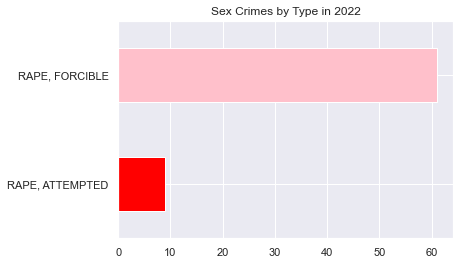

In [69]:
sex_crimes['Crm Cd Desc'].value_counts().sort_values().plot(kind="barh", stacked=True,title = 'Sex Crimes by Type in 2022', color=['red', 'pink'])

### With the next few graphs, let's review the sex crimes victims gender, descent, and age

<AxesSubplot:title={'center':'Sex Crimes Victims by Gender in 2022'}>

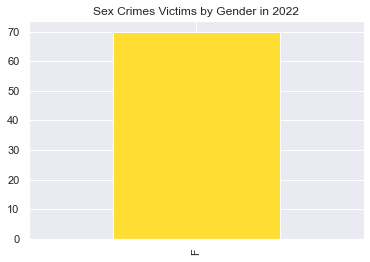

In [70]:
sex_crimes['Vict Sex'].value_counts().sort_values().plot(kind="bar", color = '#ffdd33', title = 'Sex Crimes Victims by Gender in 2022')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'B'), Text(1, 0, 'H'), Text(2, 0, 'O'), Text(3, 0, 'W')])

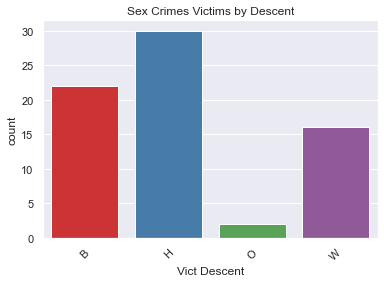

In [71]:
descent_order = ['B', 'H', 'O', 'W']

sns.countplot(x = "Vict Descent", data = sex_crimes, order = descent_order, palette="Set1").set(title='Sex Crimes Victims by Descent')
plt.xticks(rotation=45)

#### Let's do some data wrangling to categorize the age field

In [72]:
sex_crimes.loc[sex_crimes['Vict Age']<=17, 'age_group'] = 'less than 18'
sex_crimes.loc[sex_crimes['age_group']=='less than 18', 'age_sort'] = 1.0
sex_crimes.loc[sex_crimes['Vict Age'].between(18,28), 'age_group'] = '18 - 28'
sex_crimes.loc[sex_crimes['age_group']=='18 - 28', 'age_sort'] = 2
sex_crimes.loc[sex_crimes['Vict Age'].between(29,39), 'age_group'] = '29 - 39'
sex_crimes.loc[sex_crimes['age_group']=='29 - 39', 'age_sort'] = 3
sex_crimes.loc[sex_crimes['Vict Age'].between(40,49), 'age_group'] = '40 - 49'
sex_crimes.loc[sex_crimes['age_group']=='40 - 49', 'age_sort'] = 4
sex_crimes.loc[sex_crimes['Vict Age'].between(50,59), 'age_group'] = '50 - 59'
sex_crimes.loc[sex_crimes['age_group']=='50 - 59', 'age_sort'] = 5
sex_crimes.loc[sex_crimes['Vict Age'].between(60,69), 'age_group'] = '60 - 69'
sex_crimes.loc[sex_crimes['age_group']=='60 - 69', 'age_sort'] = 6
sex_crimes.loc[sex_crimes['Vict Age']>=70, 'age_group'] = 'older than 69'
sex_crimes.loc[sex_crimes['age_group']=='70 - 200', 'age_sort'] = 7
sex_crimes.tail(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date,age_group,age_sort
426900,221904360,01/09/2022 12:00:00 AM,01/09/2022 12:00:00 AM,2130,19,Mission,1906,1,122,"RAPE, ATTEMPTED",...,998.0,NaN,NaN,13300 BERG ST,NaN,34.3241,-118.4230,2022-01-09,29 - 39,3.0
426990,220105154,01/21/2022 12:00:00 AM,01/20/2022 12:00:00 AM,300,1,Central,144,1,121,"RAPE, FORCIBLE",...,998.0,NaN,NaN,400 S MAIN ST,NaN,34.0478,-118.2484,2022-01-20,18 - 28,2.0


In [73]:
sex_crimes = sex_crimes.sort_values('age_sort')
sex_crimes.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date,age_group,age_sort
413295,221804477,01/10/2022 12:00:00 AM,01/06/2022 12:00:00 AM,2100,18,Southeast,1827,1,121,"RAPE, FORCIBLE",...,998.0,NaN,NaN,92ND ST,GRAHAM,33.9533,-118.2430,2022-01-06,less than 18,1.0
426545,220205676,02/08/2022 12:00:00 AM,02/03/2022 12:00:00 AM,1700,2,Rampart,238,1,121,"RAPE, FORCIBLE",...,NaN,NaN,NaN,100 N TOLUCA ST,NaN,34.0616,-118.2586,2022-02-03,less than 18,1.0
425614,220804570,01/14/2022 12:00:00 AM,01/14/2022 12:00:00 AM,2030,8,West LA,899,1,122,"RAPE, ATTEMPTED",...,998.0,NaN,NaN,3200 CATTARAUGUS AV,NaN,34.0327,-118.3822,2022-01-14,less than 18,1.0
422829,221405273,01/27/2022 12:00:00 AM,01/16/2022 12:00:00 AM,1950,14,Pacific,1457,1,121,"RAPE, FORCIBLE",...,NaN,NaN,NaN,4700 INGLEWOOD BL,NaN,33.9932,-118.4153,2022-01-16,less than 18,1.0
422644,221805928,02/13/2022 12:00:00 AM,01/04/2022 12:00:00 AM,100,18,Southeast,1821,1,121,"RAPE, FORCIBLE",...,NaN,NaN,NaN,500 W CENTURY BL,NaN,33.9455,-118.2826,2022-01-04,less than 18,1.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'less than 18'),
  Text(1, 0, '18 - 28'),
  Text(2, 0, '29 - 39'),
  Text(3, 0, '40 - 49'),
  Text(4, 0, '50 - 59')])

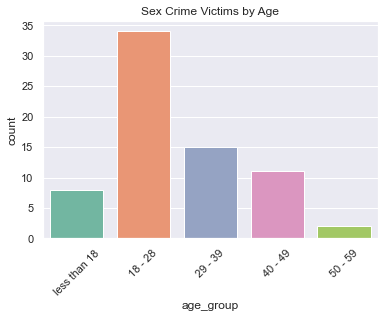

In [74]:
sns.set_theme(style="darkgrid")
day_order = ["less than 18", '18 - 28', '29 - 39', '40 - 49', '50 - 59']#, '60 - 69', 'older than 69']
sns.countplot(x = "age_group", data = sex_crimes, order = day_order, palette="Set2").set(title='Sex Crime Victims by Age')
plt.xticks(rotation=45)

## With these graphs we can learn about the occurrence of reported sex crimes in the city of Los Angeles. For the calendar year 2022, we learn that victims of sex crimes are more likely female, ofe black or hispanic descent and that victims are most likely to be between the age of 18 - 28, as of mid-February. Further we see that sex crimes are more likely to occur in the 77th and Central LAPD geographic areas.

## This analysis helps to break down some of the characteristics of this Part 1 crime.